In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Duplicate key in file PosixPath('/Users/baotong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 768 (' font.family: sans-serif')
Duplicate key in file PosixPath('/Users/baotong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 769 (' font.sans-serif: Arial Unicode MS, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')
Duplicate key in file PosixPath('/Users/baotong/opt/anaconda3/lib/python3.8/site-packages/matplotlib/mpl-data/matplotlibrc'), line 770 (' axes.unicode_minus: False')


In [2]:
from matches_info import output_xmmmatchesinfo
(matches,xmmmatchinfolist)=output_xmmmatchesinfo()

In [3]:
xmmmatchinfolist=np.array(xmmmatchinfolist)
xmmbright_ctsinfo=[]
for i in range(len(matches)):
    xmmsrcinfo=np.array(xmmmatchinfolist[i][2])
    xmmsrcinfo=np.nan_to_num(xmmsrcinfo)
    xmmbrightsrcinfo=xmmsrcinfo[np.argmax(xmmsrcinfo[:,7])]
    # print(xmmbrightsrcinfo)
    scts=xmmbrightsrcinfo[7]
    scts_1=xmmbrightsrcinfo[8]+xmmbrightsrcinfo[13]+xmmbrightsrcinfo[18]
    scts_2=xmmbrightsrcinfo[9]+xmmbrightsrcinfo[14]+xmmbrightsrcinfo[19]
    scts_3=xmmbrightsrcinfo[10]+xmmbrightsrcinfo[15]+xmmbrightsrcinfo[20]
    scts_4=xmmbrightsrcinfo[11]+xmmbrightsrcinfo[16]+xmmbrightsrcinfo[21]
    scts_5=xmmbrightsrcinfo[12]+xmmbrightsrcinfo[17]+xmmbrightsrcinfo[22]
    xmmbright_ctsinfo.append([xmmmatchinfolist[i][0][np.argmax(xmmsrcinfo[:,7])],
                              xmmmatchinfolist[i][1][np.argmax(xmmsrcinfo[:,7])],
                              xmmbrightsrcinfo[0],xmmbrightsrcinfo[1],
                              scts,scts_1,scts_2,scts_3,scts_4,scts_5])
xmmbright_ctsinfo=np.array(xmmbright_ctsinfo)

/var/folders/z1/8lm05_ks6676c0ppy4pxnrlm0000gn/T/ipykernel_39607/2034638996.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  xmmmatchinfolist=np.array(xmmmatchinfolist)


In [4]:
headsinfo=['xmmobsID','src_ID','xmmra','xmmdec','scts','scts_1','scts_2','scts_3','scts_4','scts_5']
df = pd.DataFrame(xmmbright_ctsinfo, columns=headsinfo)
csv_file_path = 'xmmbright_ctsinfo.csv'
df.to_csv(csv_file_path, index=False)

In [6]:
ctsinfo=pd.read_csv(csv_file_path)

In [7]:
def cal_HRanderr(H, S, sigma_H=None, sigma_S=None):
    if sigma_H==None:sigma_H=np.sqrt(H)
    if sigma_S==None:sigma_S=np.sqrt(S)
    z = (H - S) / (H + S)
    d_z_d_H = 2 * S / (H + S)**2
    d_z_d_S = -2 * H / (H + S)**2
    sigma_z = np.sqrt((d_z_d_H * sigma_H)**2 + (d_z_d_S * sigma_S)**2)

    return (z, sigma_z)


In [8]:
cts_soft=ctsinfo['scts_1']+ctsinfo['scts_2']
cts_mid=ctsinfo['scts_3']
cts_hard=ctsinfo['scts_4']+ctsinfo['scts_5']
(HR1,HR1_err)=cal_HRanderr(cts_mid,cts_soft)
(HR2,HR2_err)=cal_HRanderr(cts_hard,cts_soft)

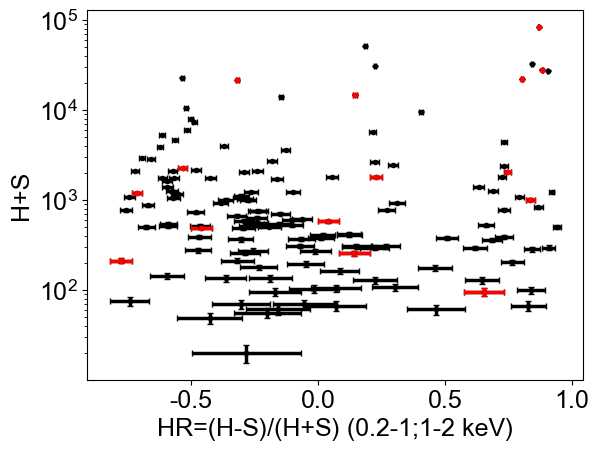

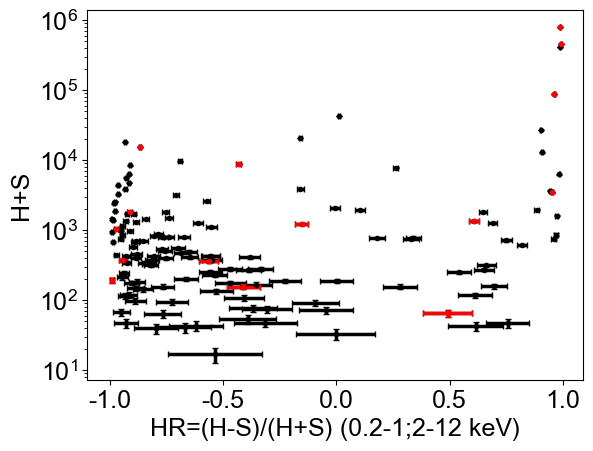

In [10]:
indexcompact=[1,2,4,12, 20 ,23, 24, 77, 78 ,79 ,80, 84, 85, 92, 99]
plt.figure(1)
plt.errorbar(HR1,cts_soft+cts_mid,xerr=HR1_err,yerr=np.sqrt(cts_soft+cts_mid),fmt='.', 
                 capsize=2,elinewidth=2.5, ecolor='black',
                 color='black',linewidth=2.0)
plt.errorbar(HR1[indexcompact],cts_soft[indexcompact]+cts_mid[indexcompact],
             xerr=HR1_err[indexcompact],yerr=np.sqrt(cts_soft[indexcompact]+cts_mid[indexcompact]),fmt='.', 
                 capsize=2,elinewidth=2.5, ecolor='red',
                 color='red',linewidth=2.0)
plt.semilogy()
plt.xlabel('HR=(H-S)/(H+S) (0.2-1;1-2 keV)',fontsize=18)
plt.ylabel('H+S',fontsize=18)
plt.tick_params(labelsize=18)
plt.semilogy()
plt.show()
plt.figure(2)
plt.errorbar(HR2,cts_soft+cts_hard,xerr=HR2_err,yerr=np.sqrt(cts_soft+cts_hard),fmt='.', 
                 capsize=2,elinewidth=2.5, ecolor='black',
                 color='black',linewidth=2.0)
plt.errorbar(HR2[indexcompact],cts_soft[indexcompact]+cts_hard[indexcompact],
             xerr=HR2_err[indexcompact],yerr=np.sqrt(cts_soft[indexcompact]+cts_hard[indexcompact]),fmt='.', 
                 capsize=2,elinewidth=2.5, ecolor='red',
                 color='red',linewidth=2.0)
plt.xlabel('HR=(H-S)/(H+S) (0.2-1;2-12 keV)',fontsize=18)
plt.ylabel('H+S',fontsize=18)
plt.tick_params(labelsize=18)
plt.semilogy()
plt.show()